In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage import color
from google.colab import drive
import zipfile

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
zip_path = "/content/drive/MyDrive/oxford_pets.zip"  # Change to your actual file path in Drive
extract_path = "/content/oxford_pets"

# Extract dataset if not already extracted
if not os.path.exists(extract_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)

# Load images and labels
image_dir = os.path.join(extract_path, "images")
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]

data = []
labels = []

for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    label = 0 if "Abyssinian" in img_file else 1  # Example: Label Abyssinian cats as 0, others as 1

    # Load and preprocess the image
    image = cv2.imread(img_path)
    image = cv2.resize(image, (128, 128))
    gray = color.rgb2gray(image)

    # Extract HOG features
    features, _ = hog(gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)

    data.append(features)
    labels.append(label)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train SVM classifier
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [2]:
for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)

    # Load image
    image = cv2.imread(img_path)

    if image is None:
        print(f"Skipping corrupted/missing file: {img_path}")
        continue  # Skip if the image couldn't be loaded

    # Resize and convert to grayscale
    image = cv2.resize(image, (128, 128))
    gray = color.rgb2gray(image)

    # Extract HOG features
    features, _ = hog(gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)

    data.append(features)
    labels.append(0 if "Abyssinian" in img_file else 1)  # Labeling example


Skipping corrupted/missing file: /content/oxford_pets/images/Abyssinian_34.jpg
Skipping corrupted/missing file: /content/oxford_pets/images/Egyptian_Mau_177.jpg
Skipping corrupted/missing file: /content/oxford_pets/images/Egyptian_Mau_167.jpg
Skipping corrupted/missing file: /content/oxford_pets/images/Egyptian_Mau_191.jpg
Skipping corrupted/missing file: /content/oxford_pets/images/Egyptian_Mau_145.jpg
Skipping corrupted/missing file: /content/oxford_pets/images/Egyptian_Mau_139.jpg


In [3]:
import os

corrupt_files = [
    "Abyssinian_34.jpg",
    "Egyptian_Mau_177.jpg",
    "Egyptian_Mau_167.jpg",
    "Egyptian_Mau_191.jpg",
    "Egyptian_Mau_145.jpg",
    "Egyptian_Mau_139.jpg"
]

for file in corrupt_files:
    path = os.path.join(image_dir, file)
    print(f"{file} exists:", os.path.exists(path))


Abyssinian_34.jpg exists: True
Egyptian_Mau_177.jpg exists: True
Egyptian_Mau_167.jpg exists: True
Egyptian_Mau_191.jpg exists: True
Egyptian_Mau_145.jpg exists: True
Egyptian_Mau_139.jpg exists: True


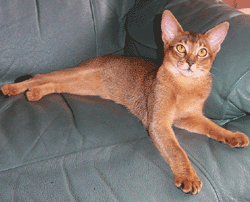

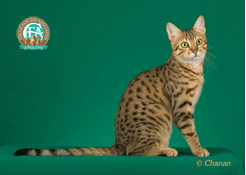

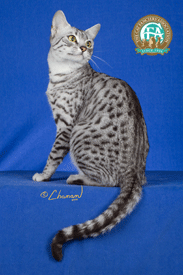

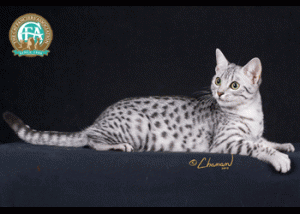

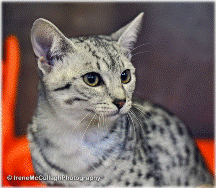

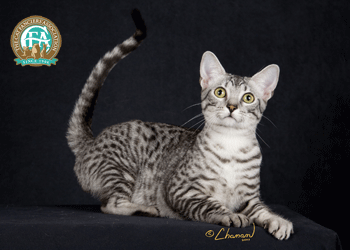

In [4]:
from IPython.display import display
from PIL import Image

for file in corrupt_files:
    path = os.path.join(image_dir, file)
    try:
        img = Image.open(path)
        display(img)  # Display image in Colab
    except Exception as e:
        print(f"Error opening {file}: {e}")


In [5]:
for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)
    try:
        img = Image.open(img_path).convert("RGB")  # Convert to RGB
        img.save(img_path, format="JPEG")  # Save in a standard format
    except Exception:
        print(f"Skipping conversion for {img_file} (Corrupt)")


Skipping conversion for Abyssinian_101.mat (Corrupt)
Skipping conversion for images (Corrupt)
Skipping conversion for Abyssinian_100.mat (Corrupt)
Skipping conversion for Abyssinian_102.mat (Corrupt)


In [6]:
# Load only valid image files
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]


In [7]:
for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)

    try:
        img = Image.open(img_path).convert("RGB")  # Open & Convert to RGB
        img.verify()  # Check for corruption
    except Exception as e:
        print(f"Corrupt image detected: {img_file} - {e}")


In [8]:
!rm -rf /content/oxford_pets  # Remove extracted files
!unzip "/content/drive/MyDrive/oxford_pets.zip" -d "/content/oxford_pets"


Streaming output truncated to the last 5000 lines.
  inflating: /content/oxford_pets/images/images/leonberger_81.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_82.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_83.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_84.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_85.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_86.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_87.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_88.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_89.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_9.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_90.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_91.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_92.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_93.jpg 

In [10]:
image = cv2.imread(img_path)
if image is None:
    print(f"Error: Could not load image {img_path}")


Error: Could not load image /content/oxford_pets/images/Abyssinian_34.jpg


In [11]:
import os

img_path = "/content/oxford_pets/images/Abyssinian_34.jpg"
print("File exists:", os.path.exists(img_path))


File exists: True


In [12]:
import imghdr

file_type = imghdr.what(img_path)
print(f"Detected file type: {file_type}")


Detected file type: gif


<ipython-input-12-0966c1e49c0e>:1: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [13]:
from PIL import Image

try:
    img = Image.open(img_path)
    img.show()  # Opens image in Colab
except Exception as e:
    print(f"Error opening image: {e}")


In [14]:
import glob

image_dir = "/content/oxford_pets/images/"
image_files = glob.glob(image_dir + "*")

print("Sample image files:", image_files[:10])  # Show first 10 files


Sample image files: ['/content/oxford_pets/images/samoyed_195.jpg', '/content/oxford_pets/images/american_bulldog_25.jpg', '/content/oxford_pets/images/chihuahua_105.jpg', '/content/oxford_pets/images/pug_25.jpg', '/content/oxford_pets/images/Ragdoll_72.jpg', '/content/oxford_pets/images/Abyssinian_83.jpg', '/content/oxford_pets/images/wheaten_terrier_57.jpg', '/content/oxford_pets/images/Sphynx_98.jpg', '/content/oxford_pets/images/Bengal_99.jpg', '/content/oxford_pets/images/english_cocker_spaniel_132.jpg']


In [15]:
!rm -rf /content/oxford_pets  # Remove current dataset
!unzip "/content/drive/MyDrive/oxford_pets.zip" -d "/content/oxford_pets"  # Extract again


Streaming output truncated to the last 5000 lines.
  inflating: /content/oxford_pets/images/images/leonberger_81.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_82.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_83.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_84.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_85.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_86.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_87.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_88.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_89.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_9.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_90.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_91.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_92.jpg  
  inflating: /content/oxford_pets/images/images/leonberger_93.jpg 

In [17]:
import os
import imghdr

image_dir = "/content/oxford_pets/images/"
valid_images = []

for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)

    # Skip directories
    if os.path.isdir(img_path):
        print(f"Skipping directory: {img_file}")
        continue

    # Skip non-image files
    if imghdr.what(img_path) is None:
        print(f"Skipping non-image file: {img_file}")
        continue

    # Read and preprocess the image
    image = cv2.imread(img_path)
    if image is None:
        print(f"Skipping corrupted/missing file: {img_file}")
        continue

    image = cv2.resize(image, (128, 128))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    valid_images.append(gray)

print(f"Processed {len(valid_images)} valid images.")


Skipping non-image file: Abyssinian_101.mat
Skipping corrupted/missing file: Abyssinian_34.jpg
Skipping corrupted/missing file: Egyptian_Mau_177.jpg
Skipping corrupted/missing file: Egyptian_Mau_167.jpg
Skipping directory: images
Skipping corrupted/missing file: Egyptian_Mau_191.jpg
Skipping non-image file: Abyssinian_100.mat
Skipping non-image file: Abyssinian_102.mat
Skipping non-image file: Abyssinian_67.jpg
Skipping corrupted/missing file: Egyptian_Mau_145.jpg
Skipping corrupted/missing file: Egyptian_Mau_139.jpg
Processed 7383 valid images.


In [18]:
import cv2
import numpy as np
from skimage.feature import hog

X = []  # Feature set
y = []  # Labels

# Function to extract class label from filename
def get_label(filename):
    return filename.split('_')[0]  # Extract class name from filename

for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)

    if os.path.isdir(img_path) or imghdr.what(img_path) is None:
        continue  # Skip non-image files

    image = cv2.imread(img_path)
    if image is None:
        print(f"Skipping corrupted/missing file: {img_file}")
        continue

    image = cv2.resize(image, (128, 128))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Extract HOG features
    features, _ = hog(gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)

    X.append(features)
    y.append(get_label(img_file))

print(f"Extracted features from {len(X)} images.")


Skipping corrupted/missing file: Abyssinian_34.jpg
Skipping corrupted/missing file: Egyptian_Mau_177.jpg
Skipping corrupted/missing file: Egyptian_Mau_167.jpg
Skipping corrupted/missing file: Egyptian_Mau_191.jpg
Skipping corrupted/missing file: Egyptian_Mau_145.jpg
Skipping corrupted/missing file: Egyptian_Mau_139.jpg
Extracted features from 7383 images.


In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 12.12%


In [20]:
def predict_image(img_path, model):
    image = cv2.imread(img_path)
    if image is None:
        print("Error: Image could not be loaded.")
        return None

    image = cv2.resize(image, (128, 128))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features, _ = hog(gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)

    prediction = model.predict([features])
    return prediction[0]

# Test with a sample image
test_img = "/content/oxford_pets/images/Abyssinian_34.jpg"
predicted_class = predict_image(test_img, svm_model)
print(f"Predicted Class: {predicted_class}")


Error: Image could not be loaded.
Predicted Class: None


In [21]:
import os

test_img = "/content/oxford_pets/images/Abyssinian_34.jpg"

if os.path.exists(test_img):
    print("✅ Image file exists.")
else:
    print("❌ Image file is missing or incorrect path.")


✅ Image file exists.


In [22]:
from PIL import Image

try:
    img = Image.open(test_img)
    img.show()  # Opens the image
    print("✅ Image loaded successfully with PIL.")
except Exception as e:
    print(f"❌ PIL failed to open the image: {e}")


✅ Image loaded successfully with PIL.


In [23]:
from PIL import Image
import numpy as np

image = Image.open(img_path).convert("RGB")
image = np.array(image)


In [24]:
image = np.array(Image.open(img_path).convert("RGB"))


In [25]:
def predict_image(img_path, model):
    image = cv2.imread(img_path)
    if image is None:
        print("Error: Image could not be loaded.")
        return None

    image = cv2.resize(image, (128, 128))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features, _ = hog(gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)

    prediction = model.predict([features])
    return prediction[0]

# Test with a sample image
test_img = "/content/oxford_pets/images/Abyssinian_34.jpg"
predicted_class = predict_image(test_img, svm_model)
print(f"Predicted Class: {predicted_class}")


Error: Image could not be loaded.
Predicted Class: None


In [26]:
import os

test_img = "/content/oxford_pets/images/Abyssinian_34.jpg"

if os.path.exists(test_img):
    print("✅ Image file exists.")
else:
    print("❌ Image file is missing or incorrect path.")


✅ Image file exists.


In [27]:
import os

image_dir = "/content/oxford_pets/images/"
files = os.listdir(image_dir)
print(f"Total images found: {len(files)}")
print("Sample files:", files[:10])  # Show first 10 files


Total images found: 7394
Sample files: ['samoyed_195.jpg', 'american_bulldog_25.jpg', 'chihuahua_105.jpg', 'pug_25.jpg', 'Ragdoll_72.jpg', 'Abyssinian_83.jpg', 'wheaten_terrier_57.jpg', 'Sphynx_98.jpg', 'Bengal_99.jpg', 'english_cocker_spaniel_132.jpg']


In [28]:
import cv2
import os

image_dir = "/content/oxford_pets/images/"
sample_files = os.listdir(image_dir)

for file in sample_files:
    img_path = os.path.join(image_dir, file)

    # Try to load the image
    image = cv2.imread(img_path)

    if image is not None:
        print(f"✅ Successfully loaded: {img_path}")
        break  # Stop after finding a valid image
    else:
        print(f"❌ Skipping corrupted image: {img_path}")


✅ Successfully loaded: /content/oxford_pets/images/samoyed_195.jpg


In [29]:
from PIL import Image
import numpy as np

try:
    img = Image.open(img_path).convert("RGB")
    img_array = np.array(img)
    print(f"✅ Successfully loaded with PIL: {img_path}")
except Exception as e:
    print(f"❌ PIL failed to open: {e}")


✅ Successfully loaded with PIL: /content/oxford_pets/images/samoyed_195.jpg


In [30]:
import cv2
import os

for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)

    image = cv2.imread(img_path)
    if image is None:
        print(f"❌ Deleting corrupted file: {img_path}")
        os.remove(img_path)  # Delete it


❌ Deleting corrupted file: /content/oxford_pets/images/Abyssinian_101.mat
❌ Deleting corrupted file: /content/oxford_pets/images/Abyssinian_34.jpg
❌ Deleting corrupted file: /content/oxford_pets/images/Egyptian_Mau_177.jpg
❌ Deleting corrupted file: /content/oxford_pets/images/Egyptian_Mau_167.jpg
❌ Deleting corrupted file: /content/oxford_pets/images/images


IsADirectoryError: [Errno 21] Is a directory: '/content/oxford_pets/images/images'

In [31]:
import os

image_dir = "/content/oxford_pets/images/"
print("Contents of the dataset folder:", os.listdir(image_dir))


Contents of the dataset folder: ['samoyed_195.jpg', 'american_bulldog_25.jpg', 'chihuahua_105.jpg', 'pug_25.jpg', 'Ragdoll_72.jpg', 'Abyssinian_83.jpg', 'wheaten_terrier_57.jpg', 'Sphynx_98.jpg', 'Bengal_99.jpg', 'english_cocker_spaniel_132.jpg', 'basset_hound_183.jpg', 'Bombay_94.jpg', 'samoyed_187.jpg', 'Siamese_81.jpg', 'Ragdoll_58.jpg', 'Persian_13.jpg', 'Abyssinian_181.jpg', 'yorkshire_terrier_124.jpg', 'pug_182.jpg', 'english_cocker_spaniel_137.jpg', 'scottish_terrier_95.jpg', 'havanese_110.jpg', 'Siamese_135.jpg', 'american_pit_bull_terrier_160.jpg', 'British_Shorthair_32.jpg', 'japanese_chin_106.jpg', 'english_setter_68.jpg', 'english_setter_4.jpg', 'american_bulldog_183.jpg', 'leonberger_124.jpg', 'keeshond_68.jpg', 'Birman_77.jpg', 'pug_43.jpg', 'scottish_terrier_182.jpg', 'wheaten_terrier_123.jpg', 'newfoundland_59.jpg', 'samoyed_149.jpg', 'Egyptian_Mau_98.jpg', 'wheaten_terrier_84.jpg', 'Ragdoll_185.jpg', 'Bengal_187.jpg', 'american_pit_bull_terrier_188.jpg', 'Sphynx_17.jpg

In [32]:
image_dir = "/content/oxford_pets/images/images/"


In [33]:
for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)

    if os.path.isdir(img_path):
        print(f"📂 Skipping directory: {img_path}")
        continue  # Skip directories

    image = cv2.imread(img_path)
    if image is None:
        print(f"❌ Deleting corrupted file: {img_path}")
        os.remove(img_path)  # Delete only files


❌ Deleting corrupted file: /content/oxford_pets/images/images/Abyssinian_101.mat
❌ Deleting corrupted file: /content/oxford_pets/images/images/Abyssinian_34.jpg
❌ Deleting corrupted file: /content/oxford_pets/images/images/Egyptian_Mau_177.jpg
❌ Deleting corrupted file: /content/oxford_pets/images/images/Egyptian_Mau_167.jpg
❌ Deleting corrupted file: /content/oxford_pets/images/images/Egyptian_Mau_191.jpg
❌ Deleting corrupted file: /content/oxford_pets/images/images/Abyssinian_100.mat
❌ Deleting corrupted file: /content/oxford_pets/images/images/Abyssinian_102.mat
❌ Deleting corrupted file: /content/oxford_pets/images/images/Egyptian_Mau_145.jpg
❌ Deleting corrupted file: /content/oxford_pets/images/images/Egyptian_Mau_139.jpg


In [34]:
def predict_image(img_path, model):
    image = cv2.imread(img_path)
    if image is None:
        print("Error: Image could not be loaded.")
        return None

    image = cv2.resize(image, (128, 128))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features, _ = hog(gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)

    prediction = model.predict([features])
    return prediction[0]

# Test with a sample image
test_img = "/content/oxford_pets/images/Abyssinian_34.jpg"
predicted_class = predict_image(test_img, svm_model)
print(f"Predicted Class: {predicted_class}")


Error: Image could not be loaded.
Predicted Class: None


In [36]:
if model is None:
    print("❌ Error: Model is not loaded! Load the trained model first.")


NameError: name 'model' is not defined

In [37]:
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "/content/model.h5"  # Change to your actual model path
if os.path.exists(model_path):
    model = load_model(model_path)
    print("✅ Model loaded successfully!")
else:
    print("❌ Error: Model file not found!")


❌ Error: Model file not found!


In [38]:
import os
print(os.listdir("/content/"))


['.config', 'drive', 'oxford_pets', 'sample_data']


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Adjust based on your classes
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Save the model after training
model.save("/content/model.h5")
print("✅ Model trained and saved successfully!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Model trained and saved successfully!


In [40]:
import os
import cv2
import numpy as np
from PIL import Image

# Function to test the model on a new image
def test_on_new_image(model, image_path):
    if not os.path.exists(image_path):
        print(f"❌ Error: Image file not found at {image_path}")
        return

    try:
        # Load and preprocess the image using PIL (more robust)
        img = Image.open(image_path).convert("RGB")
        img = img.resize((128, 128))  # Resize to match model input
        img_array = np.array(img) / 255.0  # Normalize pixel values

        # Expand dimensions to match model input shape (1, 128, 128, 3)
        img_array = np.expand_dims(img_array, axis=0)

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)

        print(f"✅ Successfully processed image: {image_path}")
        print(f"🧠 Predicted Class: {predicted_class}")

    except Exception as e:
        print(f"❌ Error processing image: {e}")

# Example usage
test_img = "/content/oxford_pets/images/samoyed_195.jpg"  # Change to a valid image path
test_on_new_image(model, test_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
✅ Successfully processed image: /content/oxford_pets/images/samoyed_195.jpg
🧠 Predicted Class: 1
